In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
n_patients = 100000
nivelDeExperiencia = np.random.choice(['Bajo', 'Medio', 'Alto'], size=n_patients, p=[0.20, 0.30, 0.50])
equipamiento = np.random.choice(['Basico', 'Intermedio', 'Avanzado'], size=n_patients, p=[0.30, 0.40, 0.30])
habilidades = np.random.choice(['Bajas', 'Medias', 'Altas'], size=n_patients, p=[0.25, 0.55, 0.20])
eM = np.zeros(n_patients)

In [ ]:
probabilidades = {
    # Experiencia ALTA
    ('Alto', 'Avanzado', 'Altas'): 0.98,
    ('Alto', 'Avanzado', 'Medias'): 0.90,
    ('Alto', 'Avanzado', 'Bajas'): 0.75,
    ('Alto', 'Intermedio', 'Altas'): 0.85,
    ('Alto', 'Intermedio', 'Medias'): 0.70,
    ('Alto', 'Intermedio', 'Bajas'): 0.50,
    ('Alto', 'Basico', 'Altas'): 0.60,
    ('Alto', 'Basico', 'Medias'): 0.45,
    ('Alto', 'Basico', 'Bajas'): 0.30,

    # Experiencia MEDIA
    ('Medio', 'Avanzado', 'Altas'): 0.80,
    ('Medio', 'Avanzado', 'Medias'): 0.65,
    ('Medio', 'Avanzado', 'Bajas'): 0.50,
    ('Medio', 'Intermedio', 'Altas'): 0.60,
    ('Medio', 'Intermedio', 'Medias'): 0.40,
    ('Medio', 'Intermedio', 'Bajas'): 0.25,
    ('Medio', 'Basico', 'Altas'): 0.35,
    ('Medio', 'Basico', 'Medias'): 0.20,
    ('Medio', 'Basico', 'Bajas'): 0.10,

    # Experiencia BAJA
    ('Bajo', 'Avanzado', 'Altas'): 0.50,
    ('Bajo', 'Avanzado', 'Medias'): 0.35,
    ('Bajo', 'Avanzado', 'Bajas'): 0.20,
    ('Bajo', 'Intermedio', 'Altas'): 0.30,
    ('Bajo', 'Intermedio', 'Medias'): 0.15,
    ('Bajo', 'Intermedio', 'Bajas'): 0.05,
    ('Bajo', 'Basico', 'Altas'): 0.15,
    ('Bajo', 'Basico', 'Medias'): 0.05,
    ('Bajo', 'Basico', 'Bajas'): 0.01,
}

for i in range(n_patients):
    condicion = (nivelDeExperiencia[i], equipamiento[i], habilidades[i])
    
    p_exito = probabilidades[condicion]
    
    eM[i] = np.random.choice([1, 0], p=[p_exito, 1 - p_exito])

In [6]:
data = pd.DataFrame({'Nivel de experiencia': nivelDeExperiencia, 'Equipamiento': equipamiento,'Habilidades': habilidades, 'Exito de la mision': eM})

In [7]:
prob_eM = data.groupby(['Nivel de experiencia', 'Equipamiento', 'Habilidades'])['Exito de la mision'].mean().reset_index()

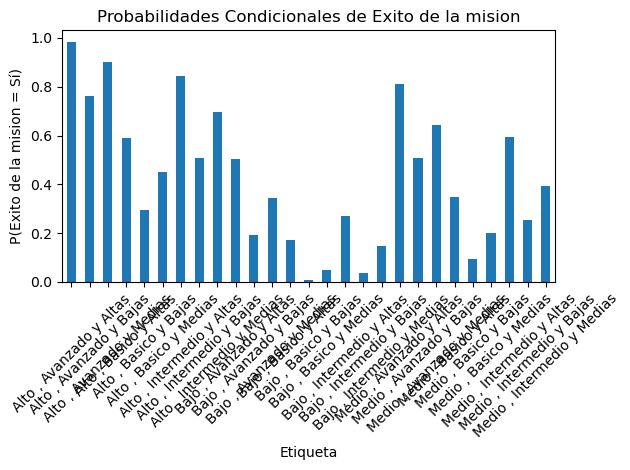

In [8]:
prob_eM['Etiqueta'] = prob_eM['Nivel de experiencia'] + ' , ' + prob_eM['Equipamiento'] + ' y ' + prob_eM['Habilidades']

fig, ax = plt.subplots()
prob_eM.plot(kind='bar', x='Etiqueta', y='Exito de la mision', ax=ax, legend=False)
ax.set_ylabel('P(Exito de la mision = Sí)')
ax.set_title('Probabilidades Condicionales de Exito de la mision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('probabilidades_condicionales_Exito de la mision.png') 
plt.show()